<a href="https://colab.research.google.com/github/marcolussetti/processopendota/blob/master/analysis/graph_heroes_picks/GraphPicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Hero Picks
This notebook will produce graphs of the heroes picked on a per-day basis.

## Processing

### Constants for configuration

In [0]:
CSV_INPUT_FILE = "https://raw.githubusercontent.com/marcolussetti/processopendota/master/data/heroes_picks_csvs/stable-picks_heroes-names_normalized.csv"
OPENDOTA_API_HEROES_ENDPOINT = "https://api.opendota.com/api/heroes/"

### Imports & Configuration

In [0]:
# If plotnine is not installed:
!pip install plotnine

# If using on google colab, might need to update statsmodels version
!pip install statsmodels -U

# If not installed
!pip install requests

In [0]:
import pandas as pd
import requests
from plotnine import *

In [0]:
%matplotlib inline

### Import data

In [0]:
# Load input csv
df = pd.read_csv(CSV_INPUT_FILE, index_col=0)

In [0]:
# Load heroes data
heroes_json = requests.get("http://api.opendota.com/api/heroes/").json()
heroes = {hero["localized_name"]: hero for hero in heroes_json}

### Examine the data

#### Structure of dataset

In [15]:
df.head()

,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,Earthshaker,Juggernaut,Mirana,Morphling,...,Elder Titan,Legion Commander,Techies,Ember Spirit,Earth Spirit,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
2011-11-23,0.031486,0.017126,0.0,0.018552,0.017540,0.026369,0.024123,0.018658,0.030975,0.013213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-24,0.031408,0.016754,0.0,0.019774,0.017370,0.026447,0.023604,0.018433,0.031188,0.013667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-25,0.032189,0.016023,0.0,0.019135,0.017809,0.027230,0.023446,0.017764,0.029913,0.013325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-26,0.031530,0.015664,0.0,0.017849,0.017426,0.027688,0.022952,0.018812,0.030192,0.013363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-27,0.033113,0.016025,0.0,0.019733,0.017809,0.026345,0.023614,0.018145,0.031392,0.013036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.describe()

,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,Earthshaker,Juggernaut,Mirana,Morphling,...,Elder Titan,Legion Commander,Techies,Ember Spirit,Earth Spirit,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,...,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,0.014037,0.016291,0.005769,0.015230,0.012595,0.019619,0.015273,0.019029,0.015199,0.006720,...,0.002175,0.008366,0.003122,0.005518,0.002080,0.002349,0.002199,0.001082,0.001394,0.000379
std,0.005244,0.005581,0.002782,0.004036,0.002548,0.006944,0.004555,0.004342,0.004643,0.003288,...,0.002216,0.009084,0.004949,0.005609,0.002281,0.002949,0.002516,0.002373,0.002658,0.001800
min,0.004609,0.005743,0.000000,0.006873,0.004424,0.010537,0.003819,0.007236,0.005784,0.001659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010392,0.013301,0.004188,0.012430,0.010751,0.015394,0.010884,0.016278,0.011641,0.004909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012597,0.015341,0.005909,0.014205,0.012510,0.018189,0.015820,0.017977,0.013427,0.005589,...,0.002304,0.009759,0.000000,0.006502,0.002072,0.002954,0.003260,0.000000,0.000000,0.000000
75%,0.016221,0.017192,0.007250,0.017893,0.013712,0.021558,0.018603,0.020105,0.019608,0.006986,...,0.003132,0.013347,0.005607,0.010028,0.003636,0.004012,0.004020,0.002338,0.003232,0.000000
max,0.048813,0.089076,0.050576,0.028260,0.028027,0.069269,0.026544,0.041925,0.031392,0.022744,...,0.044893,0.081352,0.061728,0.040209,0.028724,0.047423,0.038926,0.050782,0.037872,0.044581


#### Overall heroes  metrics

In [90]:
# Most popular heroes overall (mean)
heroes_most_popular = df.mean().sort_values(ascending=False)[:10]  # Average of normalized pick frequency
heroes_most_popular

Pudge               0.030727
Sniper              0.023150
Windranger          0.020182
Drow Ranger         0.019619
Invoker             0.019137
Juggernaut          0.019029
Bounty Hunter       0.018351
Riki                0.017892
Phantom Assassin    0.017467
Axe                 0.016291
dtype: float64

In [93]:
# Heroes with the most variation
heroes_most_variation = df.std().sort_values(ascending=False)[:10]  # Standard deviation of pick frequency
heroes_most_variation

Phantom Assassin    0.009263
Legion Commander    0.009084
Invoker             0.007350
Slark               0.006973
Drow Ranger         0.006944
Sniper              0.006183
Troll Warlord       0.006128
Windranger          0.006074
Bounty Hunter       0.005629
Ember Spirit        0.005609
dtype: float64

In [96]:
# Heroes with the least variation
heroes_least_variation = df.std().sort_values(ascending=False)[:10]  # Standard deviation of pick frequency
heroes_least_variation

Phantom Assassin    0.009263
Legion Commander    0.009084
Invoker             0.007350
Slark               0.006973
Drow Ranger         0.006944
Sniper              0.006183
Troll Warlord       0.006128
Windranger          0.006074
Bounty Hunter       0.005629
Ember Spirit        0.005609
dtype: float64

#### Exploratory graphing

In [0]:
df_with_date_col = df.copy(deep=True)
df_with_date_col = df_with_date_col.reset_index(level=0)
df_with_date_col.columns = ["Date", *df_with_date_col.columns[1:]]

In [57]:
df_with_date_col.head()

,Date,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,Earthshaker,Juggernaut,Mirana,...,Elder Titan,Legion Commander,Techies,Ember Spirit,Earth Spirit,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,2011-11-23,0.031486,0.017126,0.0,0.018552,0.017540,0.026369,0.024123,0.018658,0.030975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-11-24,0.031408,0.016754,0.0,0.019774,0.017370,0.026447,0.023604,0.018433,0.031188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-11-25,0.032189,0.016023,0.0,0.019135,0.017809,0.027230,0.023446,0.017764,0.029913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-11-26,0.031530,0.015664,0.0,0.017849,0.017426,0.027688,0.022952,0.018812,0.030192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-11-27,0.033113,0.016025,0.0,0.019733,0.017809,0.026345,0.023614,0.018145,0.031392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
basic_plot = (ggplot(df_with_date_col, aes())
 # Highest variance
 +geom_line(aes('Date', 'Phantom Assassin', group=1), color='#de7f05')
 +geom_line(aes('Date', 'Legion Commander', group=1), color='#d59a2b')
 +geom_line(aes('Date', 'Invoker', group=1), color='#cfb24f')
 +geom_line(aes('Date', 'Slark', group=1), color='#cbc675')
 +geom_line(aes('Date', 'Drow Ranger', group=1), color='#ccd89c')
 # Lowest variance
 +geom_line(aes('Date', 'Pugna', group=1), color='#0f808f')
 +geom_line(aes('Date', 'Chen', group=1), color='#42939a')
 +geom_line(aes('Date', 'Batrider', group=1), color='#65a7a6')
 +geom_line(aes('Date', 'Visage', group=1), color='#85bbb4')
 +geom_line(aes('Date', 'Enchantress', group=1), color='#a4cec3')
 # Highest popularity (skipping already used ones)
 +geom_line(aes('Date', 'Pudge', group=1), color='#038f0f')
 +geom_line(aes('Date', 'Sniper', group=1), color='#569e30')
 +geom_line(aes('Date', 'Windranger', group=1), color='#81ae4e')
 +geom_line(aes('Date', 'Juggernaut', group=1), color='#a5bd6e')
 +geom_line(aes('Date', 'Bounty Hunter', group=1), color='#c5cd91')
 #Config
 +ggtitle("Hero picks over time")
 +ylab("Frequency")
 +xlab("Time")
)

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/usr/local/lib/python3.6/dist-packages/plotni

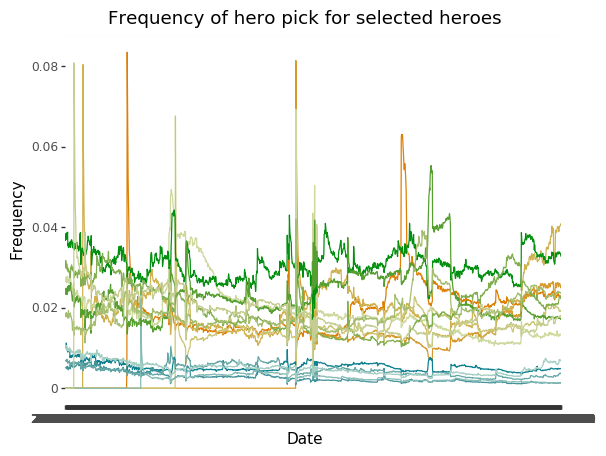

<ggplot: (-9223363257580221429)>

In [72]:
basic_plot

In [0]:
basic_plot.save("basic_plot.png", width=40, height=32, dpi=300, limitsize=False)

#### Reformat data for "easy" graphing

In [0]:
df_expl_graph = df.copy(deep=True)
# Condense values
df_expl_graph = df_expl_graph.stack()
df_expl_graph = df_expl_graph.reset_index()

df_expl_graph.columns = ["Day", "Hero", "Frequency"]

df_expl_graph["Day"] = df_expl_graph["Day"].apply(pd.to_datetime)

df_expl_graph["Week"] = df_expl_graph["Day"].apply(lambda date: "{}-{}".format(date.year,date.week))
df_expl_graph["Month"] = df_expl_graph["Day"].apply(lambda date: "{}-{}".format(date.year,date.month))
df_expl_graph["Year"] = df_expl_graph["Day"].apply(lambda date: date.year)


In [166]:
df_expl_graph.head()

,Day,Hero,Frequency,Week,Month,Year
0,2011-11-23,Anti-Mage,0.031486,2011-47,2011-11,2011
1,2011-11-23,Axe,0.017126,2011-47,2011-11,2011
2,2011-11-23,Bane,0.000000,2011-47,2011-11,2011
3,2011-11-23,Bloodseeker,0.018552,2011-47,2011-11,2011
4,2011-11-23,Crystal Maiden,0.017540,2011-47,2011-11,2011


In [0]:
df_most_popular_graph = df_expl_graph[df_expl_graph["Hero"].isin(heroes_most_popular.keys())]

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


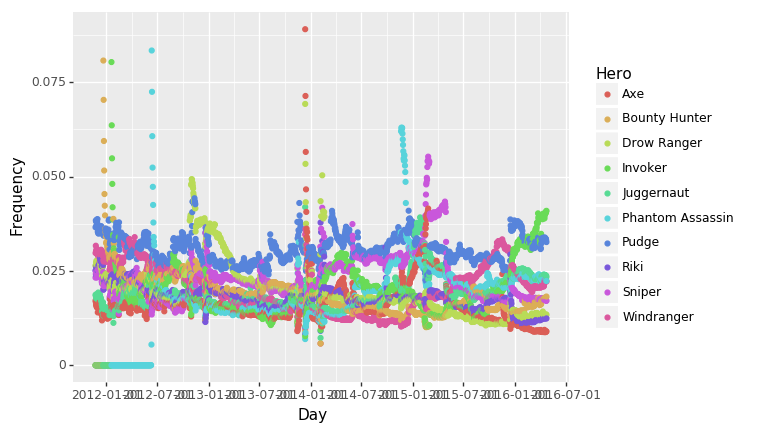

<ggplot: (-9223363257585267368)>

In [199]:
day_plot = (ggplot(df_most_popular_graph, aes(x="Day", y="Frequency", color="Hero", group=1))
              +geom_point()
             )
day_plot

In [200]:
day_plot.save("most_popular_day_plot.png", width=40, height=32, dpi=300, limitsize=False)

/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:706: UserWarning: Saving 40 x 32 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:707: UserWarning: Filename: most_popular_day_plot.png
  warn('Filename: {}'.format(filename))
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


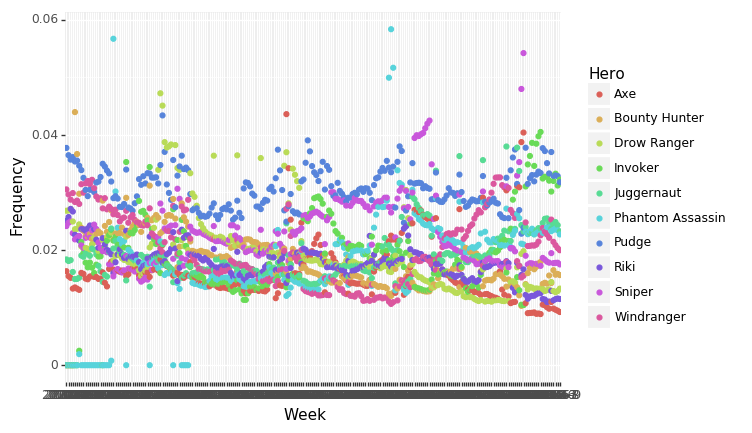

<ggplot: (8779269753811)>

In [198]:
week_plot = (ggplot(df_most_popular_graph.groupby(["Week", "Hero"]).mean().reset_index(), aes(x="Week", y="Frequency", color="Hero", group=1))
              +geom_point()
             )
week_plot

In [201]:
week_plot.save("most_popular_week_plot.png", width=40, height=32, dpi=300, limitsize=False)

/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:706: UserWarning: Saving 40 x 32 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:707: UserWarning: Filename: most_popular_week_plot.png
  warn('Filename: {}'.format(filename))
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


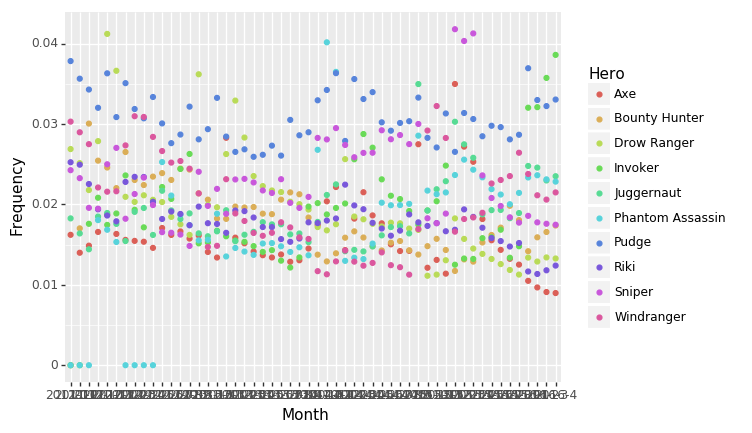

<ggplot: (8779269557210)>

In [196]:
month_plot = (ggplot(df_most_popular_graph.groupby(["Month", "Hero"]).mean().reset_index(), aes(x="Month", y="Frequency", color="Hero", group=1))
              +geom_point()
             )
month_plot

In [202]:
month_plot.save("most_popular_month_plot.png", width=40, height=32, dpi=300, limitsize=False)

/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:706: UserWarning: Saving 40 x 32 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:707: UserWarning: Filename: most_popular_month_plot.png
  warn('Filename: {}'.format(filename))
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


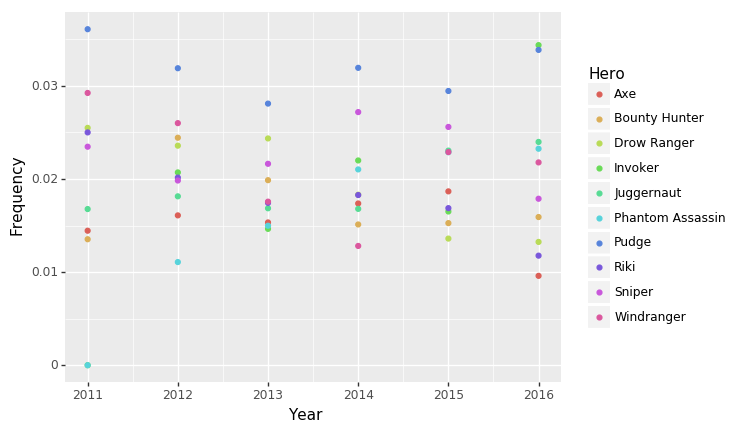

<ggplot: (-9223363257585218749)>

In [194]:
year_plot = (ggplot(df_most_popular_graph.groupby(["Year", "Hero"]).mean().reset_index(), aes(x="Year", y="Frequency", color="Hero", group=1))
              +geom_point()
             )
year_plot

In [203]:
year_plot.save("most_popular_year_plot.png", width=40, height=32, dpi=300, limitsize=False)

/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:706: UserWarning: Saving 40 x 32 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:707: UserWarning: Filename: most_popular_year_plot.png
  warn('Filename: {}'.format(filename))
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


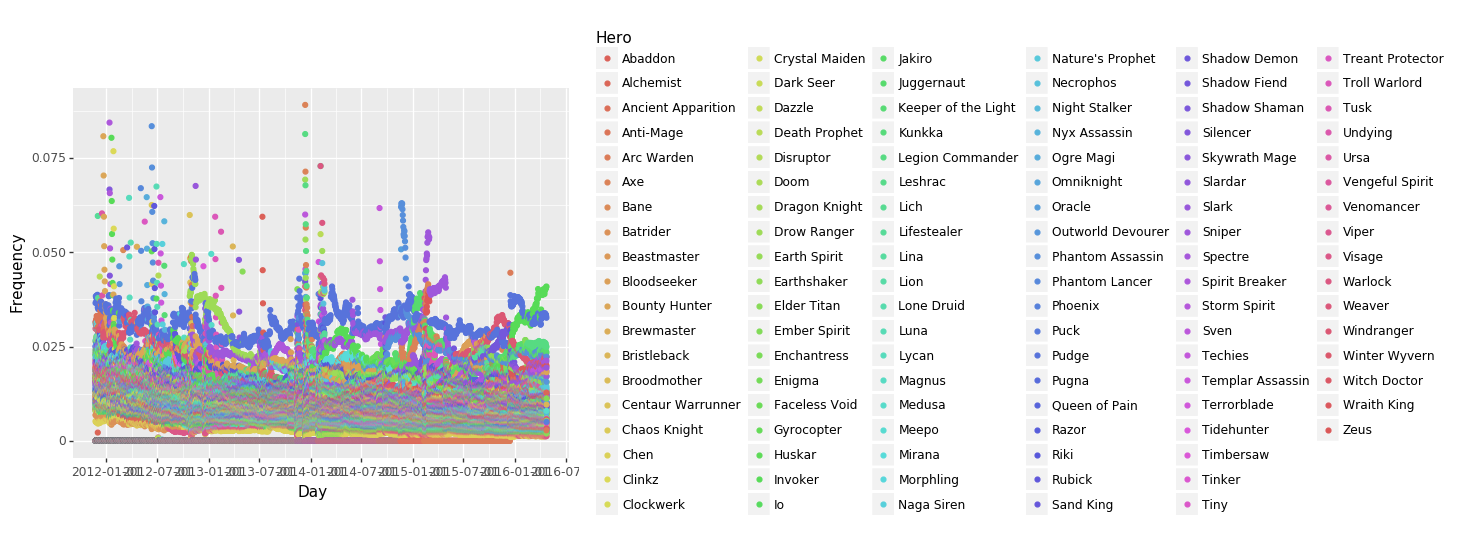

<ggplot: (-9223363257584041058)>

In [204]:
all_day_plot = (ggplot(df_expl_graph, aes(x="Day", y="Frequency", color="Hero", group=1))
              +geom_point()
             )
all_day_plot

In [205]:
all_day_plot.save("all_day_plot.png", width=40, height=32, dpi=300, limitsize=False)

/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:706: UserWarning: Saving 40 x 32 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:707: UserWarning: Filename: all_day_plot.png
  warn('Filename: {}'.format(filename))
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
